In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from heatmap import make_heatmap, matricize_df
import viz_helpers

# Seaborn style defaults. Relevant changes for us are default font, and no ticks for heatmaps
sns.set_theme()

# Default (all reddit) counts
df = viz_helpers.load_df('counts.csv')

# prefix and suffix meta df's
pf = pd.read_csv('prefixes.csv', index_col=0)
sf = pd.read_csv('suffixes.csv', index_col=0)

# book dataframe
#ngram_fname = 'ngram_counts.csv'
#bdf = viz_helpers.load_df(ngram_fname)

In [2]:
def filter_df(df, prefixes, suffixes):
    return df[
        (df.pre.isin(prefixes))
        &
        (df.suff.isin(suffixes))
    ]

pres = 'fuck,shit,dumb,dick,ass,dip,cock,douche,scum,butt,lib,soy,dirt,trump,gay,right,twat,bum,poop,turd,wank'.split(',')
suffs = 'bag,head,boy,tard,shit,ass,face,fuck,wad,hat,sucker,stain,lord,stick,oid,ster,ball,clown,licker,brain,waffle,canoe,nugget,sack'.split(',')
print(len(pres), len(suffs))
ddf = filter_df(df, pres, suffs)

mat = matricize_df(ddf, sort=True)

21 24


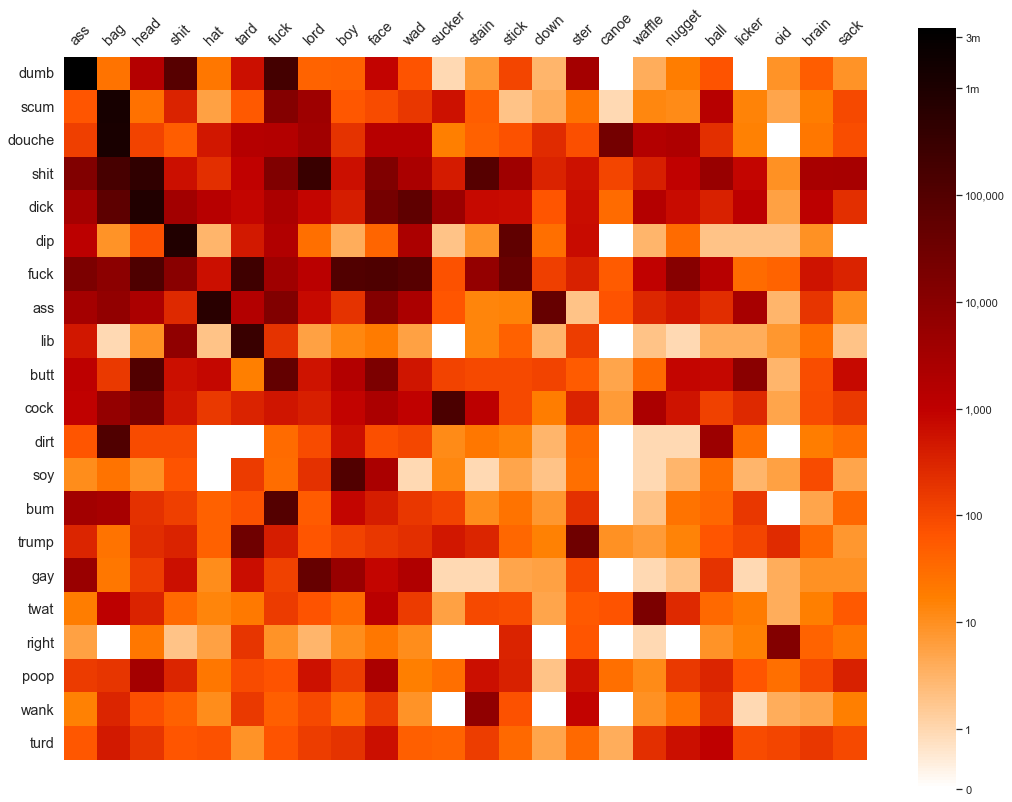

In [3]:
ax = make_heatmap(ddf,
                  #cmap='YlOrRd',
                  cmap='gist_heat_r',
                 )

In [6]:
# ngram data version
# maybe should try to use the same column/row ordering as prev for easier comparison
# XXX: This no longer works because some affixes have since been added to the counts csv without the ngrams data being updated to match.
#bddf = filter_df(bdf, pres, suffs)
#ax = make_heatmap(bddf, gamma=.25)

20 25


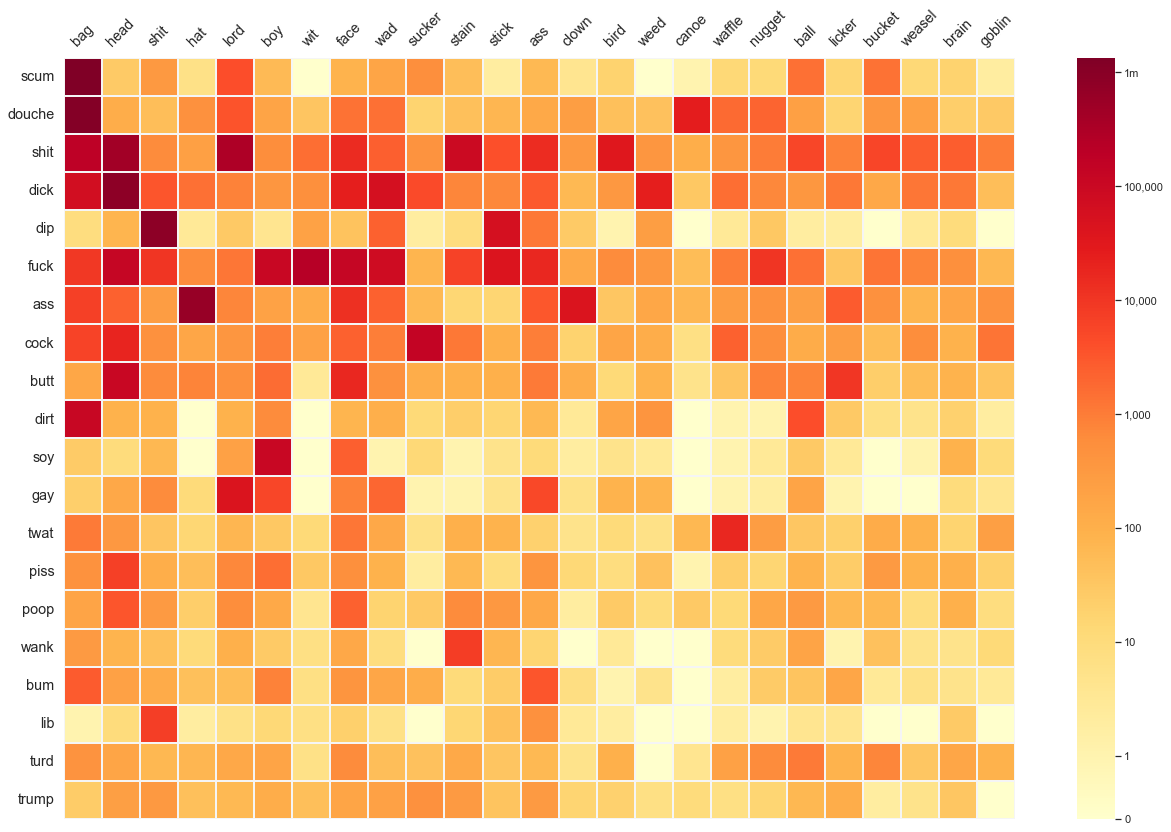

In [3]:
# Limit to noun-noun compounds.
# Delta from prev:
# - {-tard, -ster, -oid} - {right-, dumb-}. -fuck (avoid awkward fpos on assfuck/buttfuck)
# nouns but removed for fit: -sack
# see + lists for additions
pres = 'fuck,shit,dick,ass,dip,cock,douche,scum,butt,lib,soy,dirt,trump,gay,twat,bum,poop,turd,wank'.split(',') + ['piss']
suffs = 'bag,head,boy,shit,ass,face,wad,hat,sucker,stain,lord,stick,ball,clown,licker,brain,waffle,canoe,nugget'.split(',') \
    + ['bucket', 'goblin', 'wit', 'weed'] + ['bird', 'weasel']
print(len(pres), len(suffs))
edf = filter_df(df, pres, suffs)

BIGDOT = '•'
DIAMOND = '◇'
mat = matricize_df(ddf, sort=True)
ax = make_heatmap(edf, 
                  linewidths=1,
                  figsize=(22, 14),
                  wiki=0,
                  wiki_glyph=BIGDOT,
                  linecolor='whitesmoke',
                  cmap='YlOrRd',
                  #cmap='gist_heat_r',
                 )

In [9]:
# ngram version of above
if 0:
    bedf = filter_df(bdf, pres, suffs)
    ax = make_heatmap(bedf,
                      linewidths=1,
                      figsize=(22, 14),
                      wiki=1,
                      wiki_glyph=BIGDOT,
                      linecolor='whitesmoke',
                     )

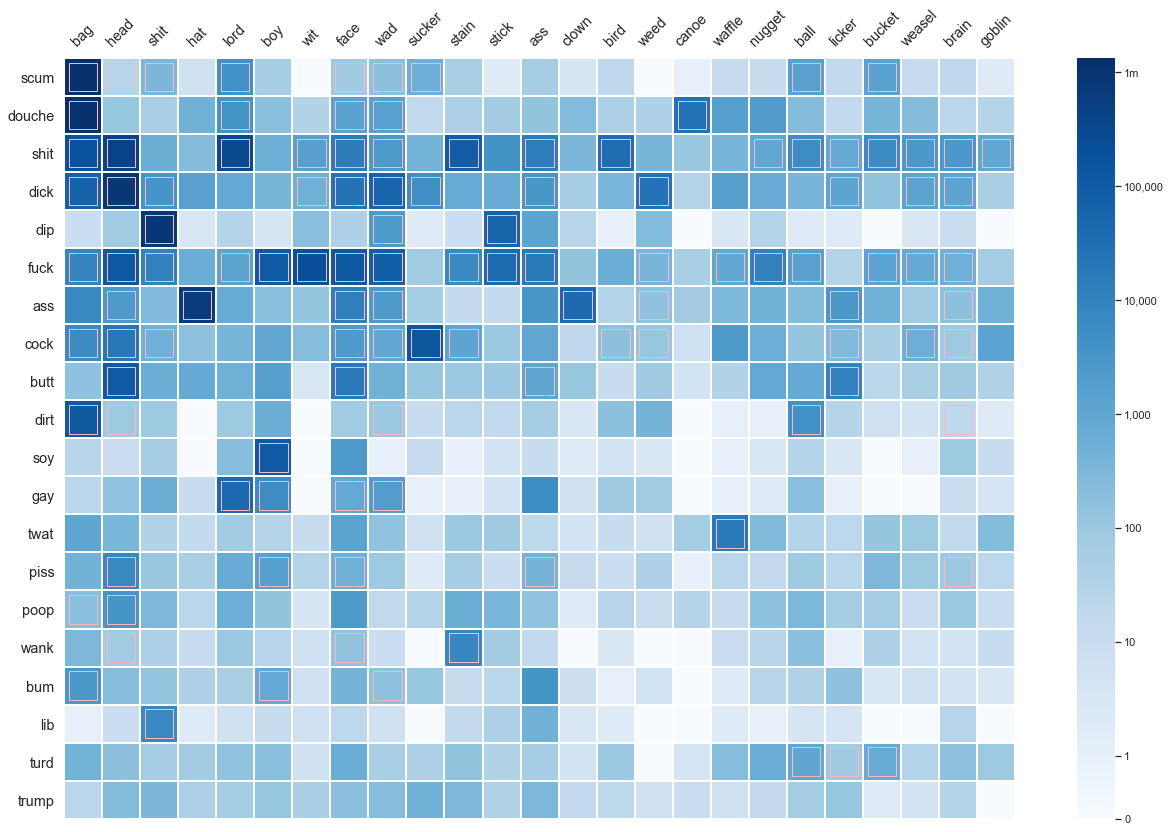

In [10]:
# Experimenting with indicating wikt status via outline
import random
random.seed(1335)

RECT_MARGIN = 0.125
JITTER = 0.0
def add_borders(ax, df, edgecolor='pink', lw=3):
    wm = matricize_df(df, True, 'wikt')
    # This is dumb, but whatever
    nrows, ncols = wm.shape
    for irow in range(nrows):
        for icol in range(ncols):
            wik = wm.iloc[irow, icol]
            if wik:
                # (0, 0) is top-left.
                coords = (icol+RECT_MARGIN + (random.random()-.5) * JITTER, irow+RECT_MARGIN + (random.random()-.5) * JITTER)
                rect = mpl.patches.Rectangle(coords, 1-RECT_MARGIN*2, 1-RECT_MARGIN*2, fill=False, edgecolor=edgecolor, lw=lw, linestyle='-')
                ax.add_patch(rect)

ax = make_heatmap(edf,
              linewidths=1,
              figsize=(22, 14),
              linecolor='white',
             )
rect_color = 'lightpink'
#rect_color = 'peru'
add_borders(ax, edf, rect_color, lw=1)

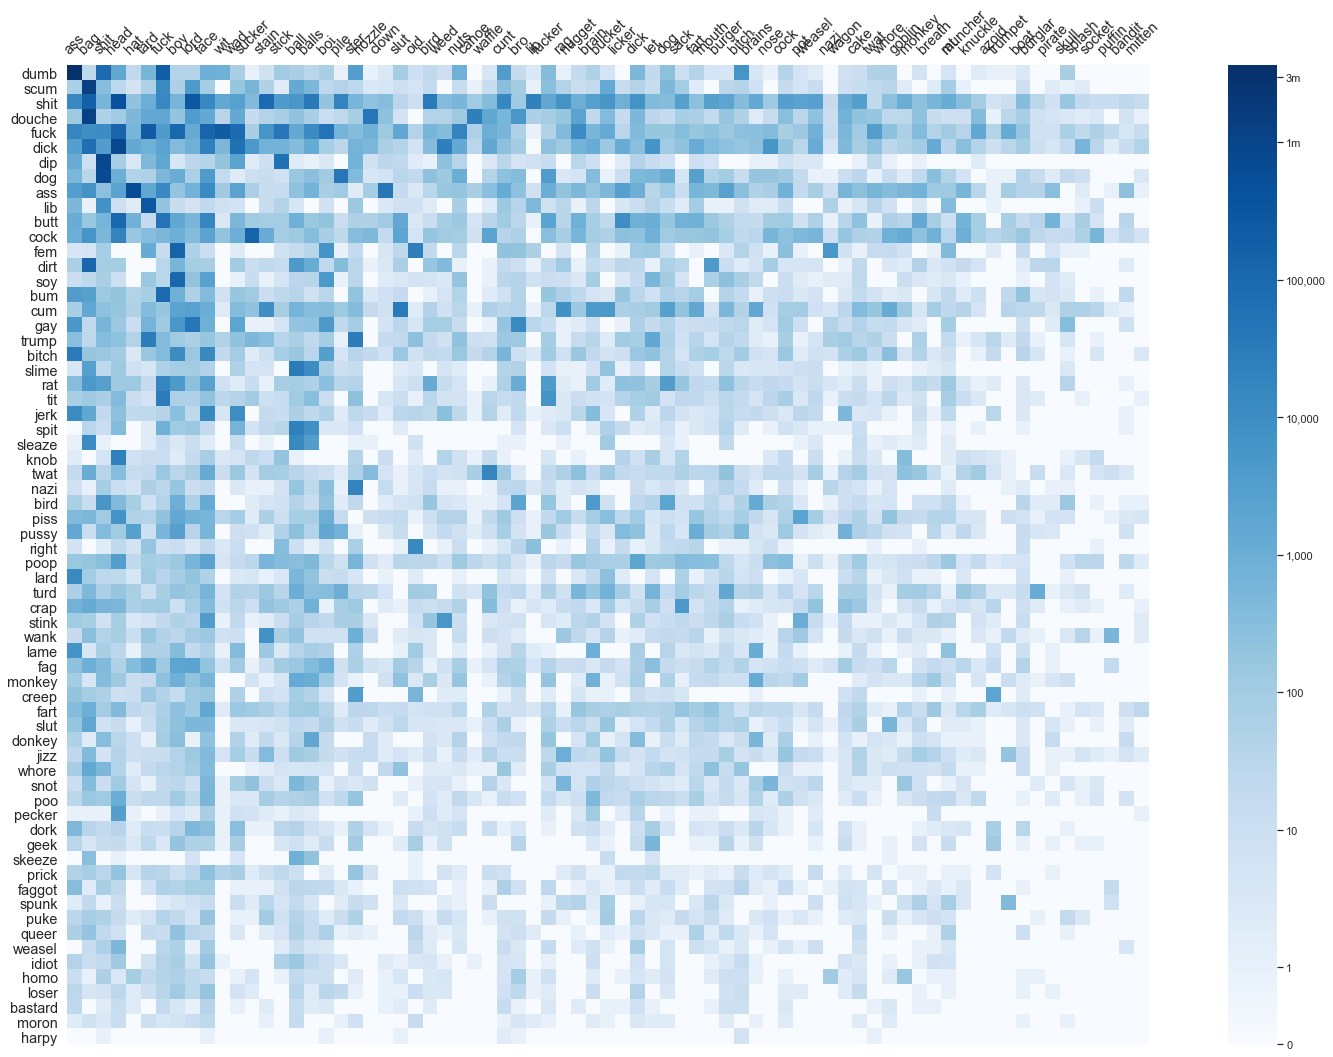

In [11]:
# full matrix
ax = make_heatmap(df,
                  figsize=(28, 18),
                 )

16 16


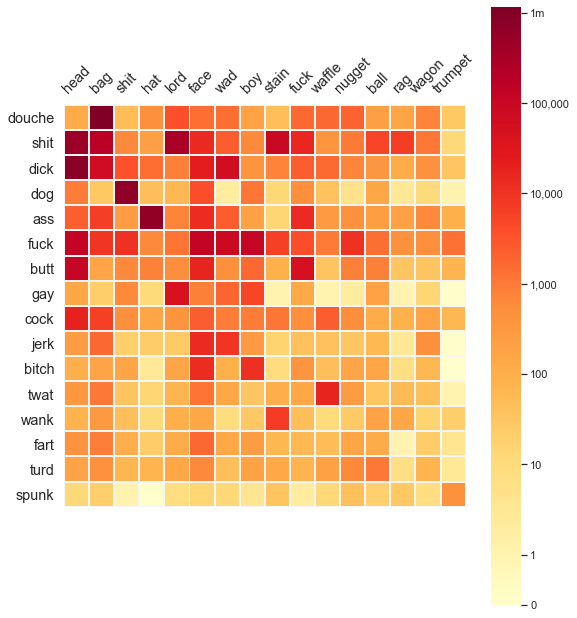

In [12]:
# Yet another combo of pres and suffixes (based on flexibility scatterplot)
pres = "fuck,shit,dick,cock,butt,gay,bitch,jerk,turd,ass,douche,twat,fart,dog,wank,spunk".split(',')
suffs = "bag,head,shit,boy,face,wad,fuck,lord,hat,stain,ball,rag,nugget,waffle,wagon,trumpet".split(',')
print(len(pres), len(suffs))
xdf = filter_df(df, pres, suffs)

fig, ax = make_heatmap(xdf, 
                  linewidths=1,
                  #figsize=(22, 14),
                  figsize=(9, 11),
                  linecolor='whitesmoke',
                  cmap='YlOrRd',
                  wiki=False,
                  return_fig=True,
                  #cmap='gist_heat_r',
                 );
#viz_helpers.savefig(fig, 'plain_matrix', bbox_inches='tight');

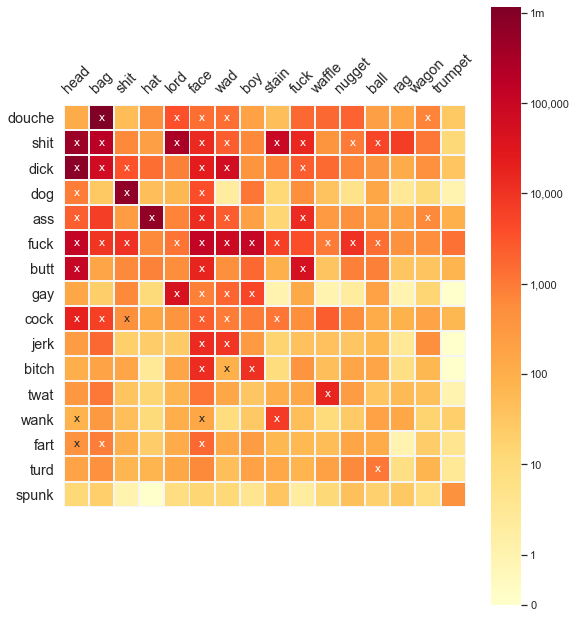

In [14]:
fig, ax = make_heatmap(xdf, 
                  linewidths=1,
                  #figsize=(22, 14),
                  figsize=(9, 11),
                  linecolor='whitesmoke',
                  cmap='YlOrRd',
                  wiki=1,
                  wiki_glyph='x',
                  return_fig=True,
                  #cmap='gist_heat_r',
                 );
#viz_helpers.savefig(fig, 'wikt_matrix', bbox_inches='tight');

In [ ]:
assert False

In [15]:
# non-sorted
fig, ax = make_heatmap(ydf, 
                       sort=False,
                  linewidths=1,
                  #figsize=(22, 14),
                  figsize=(9, 11),
                  linecolor='whitesmoke',
                  cmap='YlOrRd',
                  wiki=0,
                  wiki_glyph='x',
                  return_fig=True,
                  #cmap='gist_heat_r',
                 );

NameError: name 'ydf' is not defined

In [ ]:
#### SCRATCH

In [16]:
pf.sort_values(by='count_rank').head(5).index.to_list()

['dumb', 'scum', 'shit', 'douche', 'fuck']

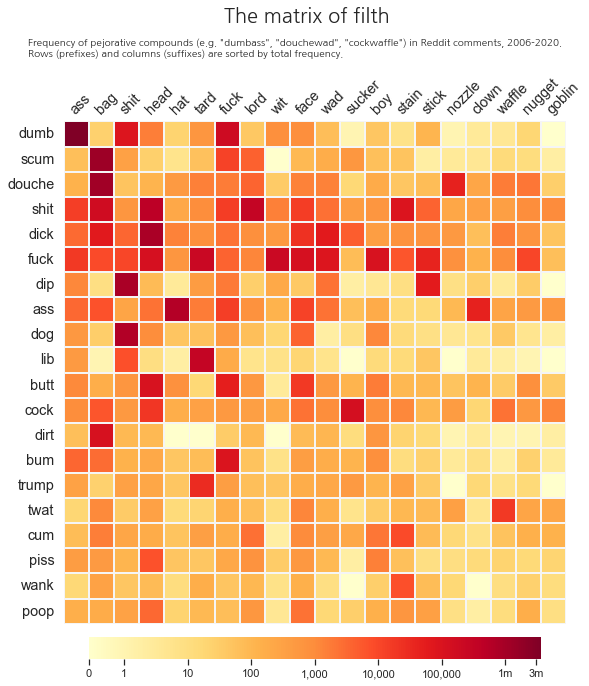

In [100]:
# Yet more experimentation with pres and suffs
x = 15
npres = x
nsuffs = x

blist = 'fem,soy'.split(',')
preplus = 'twat,piss,poop,wank,trump'.split(',')
suffplus = 'waffle,clown,nugget,goblin,nozzle'.split(',')
pres = pf[~pf.index.isin(blist)].sort_values(by='count_rank').head(npres).index.to_list() + preplus
suffs = sf[~sf.index.isin(blist)].sort_values(by='count_rank').head(nsuffs).index.to_list() + suffplus

ydf = filter_df(df, pres, suffs)

annots = 1

fig, ax = make_heatmap(ydf,
                       sort='logg',
                  linewidths=1,
                  figsize=(9, 12),
                  linecolor='whitesmoke',
                  cmap='YlOrRd',
                  wiki=False,
                  return_fig=True,
                  #cmap='gist_heat_r',
                       cbar_kws=dict(
                           orientation='horizontal',
                           shrink=.9,
                           pad=0.02,
                       ),
                 );

if annots:
    if 1:
        fig.text(.5, .95,
                "The matrix of filth",
                 fontsize=20,
                 fontname='NanumGothic',
                 #fontweight='bold',
                 ha='center',
                )
    fig.text(.07, .91,
             ('Frequency of pejorative compounds (e.g. "dumbass", "douchewad", "cockwaffle") in Reddit comments, 2006-2020.'
             '\nRows (prefixes) and columns (suffixes) are sorted by total frequency.'),
             ha='left',
             fontname='NanumGothic',
             fontsize=10,
    )
    if 0:
        fig.text(.9, .15,
                 ("@halfeatenscone"
                  "\nsource code + dataset: github.com/colinmorris/pejorative-compounds"
                 ),
                 ha='right',
                 fontname='monospace',
                 fontsize=10,
        )
# Some fine-grained dicking around with placement of column labels. Their default placement
# is just a little wonky, esp. for longer labels.
#ax.tick_params(axis='x', top=True, length=2)
if 1:
    plt.setp(ax.get_xticklabels(), 
             ha='left',
             va='bottom',
             #rotation_mode='anchor',
            )
# Amount to nudge labels by
dx = -.12
dy = -.07
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for tick in ax.get_xticklabels():
    tick.set_transform(tick.get_transform() + offset)
if annots:
    plt.savefig('extra_matrix.png', dpi=fig.dpi*2, bbox_inches='tight')
else:
    viz_helpers.savefig(fig, 'plain_matrix', bbox_inches='tight');

In [90]:
ydf[ydf['count'] == 0]

,pre,suff,count,wikt
1843,wank,sucker,0.0,False
1845,wank,clown,0.0,False
1911,dumb,goblin,0.0,False
2641,dip,goblin,0.0,False
3209,scum,wit,0.0,False
3325,dirt,hat,0.0,False
3347,dirt,tard,0.0,False
3355,dirt,wit,0.0,False
3955,lib,goblin,0.0,False
3960,lib,sucker,0.0,False


In [91]:
len(ydf[ydf['count'] == 0])

13

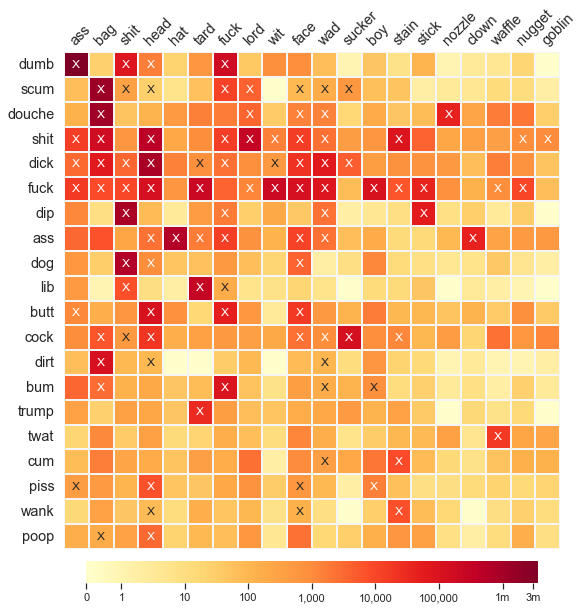

In [93]:
fig, ax = make_heatmap(ydf, 
                       sort='logg',
                  linewidths=1,
                  figsize=(9, 11),
                  linecolor='whitesmoke',
                  cmap='YlOrRd',
                  wiki=1,
                       wiki_glyph='X',
                  return_fig=True,
                  cbar_kws=dict(
                           orientation='horizontal',
                           shrink=.9,
                           pad=0.02,
                       ),
                 );
if 1:
    plt.setp(ax.get_xticklabels(), 
             ha='left',
             va='bottom',
             #rotation_mode='anchor',
            )
# Amount to nudge labels by
dx = -.12
dy = -.07
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for tick in ax.get_xticklabels():
    tick.set_transform(tick.get_transform() + offset)
viz_helpers.savefig(fig, 'wikt_matrix', bbox_inches='tight');

In [ ]:
df[df.suff == 'trumpet'].sort_values(by='count', ascending=False)

In [ ]:
mat.loc['turd']

In [ ]:
precounts = df.groupby('pre')['count'].sum()
suffcounts = df.groupby('suff')['count'].sum()
animals = ['dog', 'monkey', 'rat', 'weasel', 'bird']
precounts.loc[animals]

In [ ]:
suffcounts.loc[animals]

In [ ]:
FS = (18, 10)
fig, ax = plt.subplots(figsize=FS)
precounts = df.groupby('pre')['count'].sum().sort_values(ascending=False)
d = pd.DataFrame(precounts).reset_index()
sns.barplot(x='pre', y='count', data=d, ax=ax);

In [ ]:
df[df.suff == 'hat'].sort_values(by='count')

618185 / df[df.suff == 'hat']['count'].sum()

In [ ]:
min10 = df[df['count'] >= 10]
print(
    len(min10),
    min10.wikt.sum(),
)

In [ ]:
import numpy as np